In [1]:
import sys
sys.path.append("../code/")
from common import APPLIANCES_ORDER
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np


In [14]:
train_X = np.random.randn(100, 5)
train_Y = np.random.randn(100, 5)*0.01 + train_X


In [51]:
weights = K.abs(K.constant(np.random.randn(*train_X.shape)))

def custom_loss_1(y_true, y_pred):
    return K.mean(K.abs(y_true-y_pred)*weights)

def custom_loss_2(y_true, y_pred):
    return K.mean(K.abs(y_true-y_pred)*K.ones_like(y_true))


from functools import partial

def custom_loss_3(y_true, y_pred, weights):
    return K.mean(K.abs(y_true-y_pred)*K.constant(weights, dtype=y_true.dtype))

cl3 = partial(custom_loss_3, weights=weights)

In [65]:
w = np.random.randn(5)
def custom_loss_4(y_true, y_pred):
    return K.mean(K.abs(y_true-y_pred)*w)

In [67]:
from keras.layers import Dense, Input
from keras import Model
import keras.backend as K

input_layer = Input(shape=(5,))
out = Dense(5)(input_layer)
model = Model(input_layer, out)
model.compile('adam','mean_absolute_error')
model.fit(train_X, train_Y, epochs=1)

Epoch 1/1
100/100 [==============================] - 0s 4ms/step - loss: 1.1273


In [41]:
model.compile('adam',custom_loss_1)
model.fit(train_X, train_Y, epochs=10)

Epoch 1/10


InvalidArgumentError: Incompatible shapes: [32,5] vs. [100,5]
	 [[Node: training_14/Adam/gradients/loss_15/dense_10_loss/mul_grad/BroadcastGradientArgs = BroadcastGradientArgs[T=DT_INT32, _class=["loc:@loss_15/dense_10_loss/mul"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](training_14/Adam/gradients/loss_15/dense_10_loss/mul_grad/Shape, training_14/Adam/gradients/loss_15/dense_10_loss/mul_grad/Shape_1)]]

Caused by op 'training_14/Adam/gradients/loss_15/dense_10_loss/mul_grad/BroadcastGradientArgs', defined at:
  File "/Users/nipun/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/nipun/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2808, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-41-b7c0f951c65b>", line 2, in <module>
    model.fit(train_X, train_Y, epochs=10)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/keras/engine/training.py", line 1634, in fit
    self._make_train_function()
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/keras/engine/training.py", line 990, in _make_train_function
    loss=self.total_loss)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 87, in wrapper
    return func(*args, **kwargs)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/keras/optimizers.py", line 415, in get_updates
    grads = self.get_gradients(loss, params)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/keras/optimizers.py", line 73, in get_gradients
    grads = K.gradients(loss, params)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 2394, in gradients
    return tf.gradients(loss, variables, colocate_gradients_with_ops=True)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 581, in gradients
    grad_scope, op, func_call, lambda: grad_fn(op, *out_grads))
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 353, in _MaybeCompile
    return grad_fn()  # Exit early
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 581, in <lambda>
    grad_scope, op, func_call, lambda: grad_fn(op, *out_grads))
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py", line 742, in _MulGrad
    rx, ry = gen_array_ops._broadcast_gradient_args(sx, sy)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 532, in _broadcast_gradient_args
    "BroadcastGradientArgs", s0=s0, s1=s1, name=name)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

...which was originally created as op 'loss_15/dense_10_loss/mul', defined at:
  File "/Users/nipun/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
[elided 16 identical lines from previous traceback]
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-41-b7c0f951c65b>", line 1, in <module>
    model.compile('adam',custom_loss_1)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/keras/engine/training.py", line 860, in compile
    sample_weight, mask)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/keras/engine/training.py", line 459, in weighted
    score_array = fn(y_true, y_pred)
  File "<ipython-input-39-f5d2d14645f9>", line 4, in custom_loss_1
    return K.mean(K.abs(y_true-y_pred)*weights)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 894, in binary_op_wrapper
    return func(x, y, name=name)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 1117, in _mul_dispatch
    return gen_math_ops._mul(x, y, name=name)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 2726, in _mul
    "Mul", x=x, y=y, name=name)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Incompatible shapes: [32,5] vs. [100,5]
	 [[Node: training_14/Adam/gradients/loss_15/dense_10_loss/mul_grad/BroadcastGradientArgs = BroadcastGradientArgs[T=DT_INT32, _class=["loc:@loss_15/dense_10_loss/mul"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](training_14/Adam/gradients/loss_15/dense_10_loss/mul_grad/Shape, training_14/Adam/gradients/loss_15/dense_10_loss/mul_grad/Shape_1)]]


In [53]:
import keras
keras.losses.get('mse')(np.array([1,2]), np.array([1,3]))

<tf.Tensor 'Mean_1:0' shape=() dtype=int64>

In [68]:
model.compile('adam',custom_loss_4)
model.fit(train_X, train_Y, epochs=10)

Epoch 1/10
100/100 [==============================] - 0s 3ms/step - loss: 0.1632
Epoch 2/10
100/100 [==============================] - 0s 73us/step - loss: 0.1573
Epoch 3/10
100/100 [==============================] - 0s 71us/step - loss: 0.1519
Epoch 4/10
100/100 [==============================] - 0s 90us/step - loss: 0.1464
Epoch 5/10
100/100 [==============================] - 0s 78us/step - loss: 0.1409
Epoch 6/10
100/100 [==============================] - 0s 68us/step - loss: 0.1354
Epoch 7/10
100/100 [==============================] - 0s 96us/step - loss: 0.1301
Epoch 8/10
100/100 [==============================] - 0s 75us/step - loss: 0.1245
Epoch 9/10
100/100 [==============================] - 0s 75us/step - loss: 0.1192
Epoch 10/10
100/100 [==============================] - 0s 71us/step - loss: 0.1138


In [54]:
model.compile('adam',custom_loss_2)
model.fit(train_X, train_Y, epochs=10)

Epoch 1/10
100/100 [==============================] - 0s 3ms/step - loss: 1.0259
Epoch 2/10
100/100 [==============================] - 0s 59us/step - loss: 1.0204
Epoch 3/10
100/100 [==============================] - 0s 60us/step - loss: 1.0152
Epoch 4/10
100/100 [==============================] - 0s 51us/step - loss: 1.0101
Epoch 5/10
100/100 [==============================] - 0s 71us/step - loss: 1.0052
Epoch 6/10
100/100 [==============================] - 0s 60us/step - loss: 1.0001
Epoch 7/10
100/100 [==============================] - 0s 74us/step - loss: 0.9952
Epoch 8/10
100/100 [==============================] - 0s 85us/step - loss: 0.9903
Epoch 9/10
100/100 [==============================] - 0s 73us/step - loss: 0.9853
Epoch 10/10
100/100 [==============================] - 0s 85us/step - loss: 0.9802


In [82]:
import numpy as np
from keras.layers import Dense, Input
from keras import Model
import keras.backend as K
from functools import partial


def custom_loss_4(y_true, y_pred, weights):
    return K.mean(K.abs(y_true - y_pred) * weights)


train_X = np.random.randn(100, 5)
train_Y = np.random.randn(100, 5) * 0.01 + train_X
weights = np.abs(np.random.randn(*train_X.shape))

input_layer = Input(shape=(5,))
weights_tensor = Input(shape=(5,))
out = Dense(5)(input_layer)
cl4 = partial(custom_loss_4, weights=weights_tensor)
#model = Model([input_layer, weights_tensor], out)
#model.compile('adam', cl4)
model.fit(x=[train_X, weights], y=train_Y, epochs=10)

Epoch 1/10
100/100 [==============================] - 0s 3ms/step - loss: 0.5674
Epoch 2/10
100/100 [==============================] - 0s 80us/step - loss: 0.5642
Epoch 3/10
100/100 [==============================] - 0s 67us/step - loss: 0.5609
Epoch 4/10
100/100 [==============================] - 0s 187us/step - loss: 0.5578
Epoch 5/10
100/100 [==============================] - 0s 147us/step - loss: 0.5545
Epoch 6/10
100/100 [==============================] - 0s 184us/step - loss: 0.5512
Epoch 7/10
100/100 [==============================] - 0s 119us/step - loss: 0.5481
Epoch 8/10
100/100 [==============================] - 0s 184us/step - loss: 0.5449
Epoch 9/10
100/100 [==============================] - 0s 146us/step - loss: 0.5417
Epoch 10/10
100/100 [==============================] - 0s 149us/step - loss: 0.5385


In [64]:
#model.compile('adam',custom_loss_1)
model.fit(train_X, train_Y, epochs=100, batch_size=len(train_Y))

Epoch 1/100
100/100 [==============================] - 0s 16us/step - loss: 0.6936
Epoch 2/100
100/100 [==============================] - 0s 22us/step - loss: 0.6668
Epoch 3/100
100/100 [==============================] - 0s 17us/step - loss: 0.6856
Epoch 4/100
100/100 [==============================] - 0s 15us/step - loss: 0.6723
Epoch 5/100
100/100 [==============================] - 0s 14us/step - loss: 0.6870
Epoch 6/100
100/100 [==============================] - 0s 18us/step - loss: 0.6717
Epoch 7/100
100/100 [==============================] - 0s 17us/step - loss: 0.6647
Epoch 8/100
100/100 [==============================] - 0s 16us/step - loss: 0.6879
Epoch 9/100
100/100 [==============================] - 0s 21us/step - loss: 0.6400
Epoch 10/100
100/100 [==============================] - 0s 18us/step - loss: 0.6661
Epoch 11/100
100/100 [==============================] - 0s 13us/step - loss: 0.6803
Epoch 12/100
100/100 [==============================] - 0s 13us/step - loss: 0.6706
E

Epoch 99/100
100/100 [==============================] - 0s 16us/step - loss: 0.5795
Epoch 100/100
100/100 [==============================] - 0s 13us/step - loss: 0.6180


In [4]:
def create_subset_dataset(tensor, start=160, num_days=112):
    t_subset = tensor[:, :, start:start+num_days, :]
    all_indices = np.array(list(range(320)))
    for i in range(1, 7):
        valid_homes = pd.DataFrame(t_subset[:, i, :].reshape(320, num_days*24)).dropna().index
        all_indices = np.intersect1d(all_indices, valid_homes)
    print(len(all_indices))
    t_subset = t_subset[all_indices, :, :, :].reshape(len(all_indices), 7, num_days*24)
    
    # Create artificial aggregate
    t_subset[:, 0, :] = 0.0
    for i in range(1, 7):
        t_subset[:, 0, :] = t_subset[:, 0, :] + t_subset[:, i, :]
    # t_subset is of shape (#home, appliance, days*hours)
    return t_subset, all_indices

In [5]:
t_all, valid_homes = create_subset_dataset(tensor)
t_all.shape

52


(52, 7, 2688)

In [6]:
def my_objective(y_pred, y_true):
    with tf.name_scope(None):
        return tf.losses.absolute_difference(y_pred, y_true)

In [7]:
from random import randint
from numpy import array
from numpy import argmax
from numpy import array_equal
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
import keras
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
n_movies = 3
n_users=3
n_latent_factors=2

Using TensorFlow backend.


In [8]:
from itertools import combinations

In [9]:
len(list(combinations(range(30), 2)))

435

In [10]:
t_all_new = np.zeros((200, 7, 2688))
for i, (home_1, home_2) in enumerate(list(combinations(range(30), 2))[:200]):
    print(home_1, home_2)
    t_all_new[i,:, :] = (t_all[home_1,:,:] + t_all[home_2,:,:])/2


0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
6 25
6 26
6 27
6 28
6 29
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24
7 25


In [11]:
home_1, home_2
num_days=112

In [12]:
np.concatenate([t_all_new[:,0,:].reshape(-1, 24), t_all[:30, 0, :].reshape(30*num_days, 24)]).shape

(25760, 24)

In [13]:
train_agg.shape, t_all_new[:,0,:].shape

NameError: name 'train_agg' is not defined

In [14]:
num_days = 112

In [15]:
train_agg = np.concatenate([t_all_new[:,0,:].reshape(-1, 24), t_all[:30, 0, :].reshape(30*num_days, 24)])

train_hvac = np.concatenate([t_all_new[:,1,:].reshape(-1, 24), t_all[:30, 1, :].reshape(30*num_days, 24)])
train_fridge = np.concatenate([t_all_new[:,2,:].reshape(-1, 24), t_all[:30, 2, :].reshape(30*num_days, 24)])
train_mw = np.concatenate([t_all_new[:,3,:].reshape(-1, 24), t_all[:30, 3, :].reshape(30*num_days, 24)])
train_dw = np.concatenate([t_all_new[:,4,:].reshape(-1, 24), t_all[:30, 4, :].reshape(30*num_days, 24)])
train_wm = np.concatenate([t_all_new[:,5,:].reshape(-1, 24), t_all[:30, 5, :].reshape(30*num_days, 24)])
train_oven = np.concatenate([t_all_new[:,6,:].reshape(-1, 24), t_all[:30, 6, :].reshape(30*num_days, 24)])








train_agg_new = train_hvac + train_fridge





test_hvac = t_all[30:52, 1, :].reshape(22*num_days, 24)
test_fridge = t_all[30:52, 2, :].reshape(22*num_days, 24)
test_mw = t_all[30:52, 3, :].reshape(22*num_days, 24)
test_dw = t_all[30:52, 4, :].reshape(22*num_days, 24)
test_wm = t_all[30:52, 5, :].reshape(22*num_days, 24)
test_oven = t_all[30:52, 6, :].reshape(22*num_days, 24)
test_appliance = t_all[30:52, 1:, :].reshape(22*num_days, 6*24)









test_agg = t_all[30:, 0, :].reshape(22*num_days, 24)
test_agg_new = test_hvac + test_fridge



In [16]:
APPLIANCES_ORDER

['aggregate', 'hvac', 'fridge', 'mw', 'dw', 'wm', 'oven']

In [17]:
train_hvac_fridge = np.hstack([train_hvac, train_fridge])
train_all_appliances = np.hstack([train_hvac, train_fridge, train_mw, train_dw, train_wm, train_oven])
test_all_appliances = np.hstack([test_hvac, test_fridge, test_mw, test_dw, test_wm, test_oven])

In [18]:
train_hvac.shape, test_all_appliances.shape

((25760, 24), (2464, 144))

In [19]:
ENERGY_MEAN = {APPLIANCES_ORDER[i]:np.mean(t_all[:, i, :]) for i in list(range(1, 7))}
ENERGY_MEAN = pd.Series(ENERGY_MEAN)
ENERGY_MEAN.sort_values(inplace=True, ascending=False)
ENERGY_MEAN

hvac      972.691387
fridge     88.831789
oven       16.751671
dw         14.304646
mw          6.215498
wm          4.932920
dtype: float64

In [20]:
num_iterations_dictionary = {'hvac':1200,'fridge':400,'mw':150,'dw':150,'oven':150, 'wm':150}



In [21]:
np.random.seed(0)
from keras.layers.merge import Subtract, Minimum, Multiply, Maximum
import keras.backend as K
from keras.layers import Reshape

layers = {}
appliance="hvac"


In [22]:
np.random.seed(0)
layers['Aggregate'] = keras.layers.Input(shape=[24],name='Aggregate')
for appliance_num, appliance in enumerate(ENERGY_MEAN.index[:]):
    if appliance_num==0:
        prev = 'Aggregate'
        layers['{}-dense'.format(appliance)] = keras.layers.Dense(units=50,name='{}-layer-1'.format(appliance), activation='relu')(layers['Aggregate'])
    else:
        prev = 'Subtracting-{}'.format(ENERGY_MEAN.index[appliance_num-1])
        layers['{}-dense'.format(appliance)] = keras.layers.Dense(units=50,name='{}-layer-1'.format(appliance), activation='relu')(layers[prev])
    print(appliance, prev)
    layers['{}-dropout'.format(appliance)] = keras.layers.Dropout(rate=0.05,name='Droput-{}'.format(appliance))(layers['{}-dense'.format(appliance)])
    layers['{}-output'.format(appliance)]= keras.layers.Dense(units=24,name='{}-output'.format(appliance), activation='relu')(layers['{}-dropout'.format(appliance)])
    layers['{}-clipped-output'.format(appliance)] = Minimum(name='Clipped-{}'.format(appliance))([layers['{}-output'.format(appliance)], layers['Aggregate']])
    
    # Subtracting out appliance from prev
    layers['Subtracting-{}'.format(appliance)] = Subtract(name='Subtracting-{}'.format(appliance))([layers[prev], layers['{}-clipped-output'.format(appliance)]])
    




concat = keras.layers.merge([layers['{}-clipped-output'.format(appliance)] for appliance in APPLIANCES_ORDER[1:]], mode='concat',name='Concat-LAYER')
#c = Reshape(target_shape=(-1,1))(concat)
model = keras.Model(layers['Aggregate'], concat )

with open('tree.pdf','wb') as f:
    f.write(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='pdf'))



#SVG(model_to_dot(model,  show_shapes=False, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

hvac Aggregate
fridge Subtracting-hvac
oven Subtracting-fridge
dw Subtracting-oven
mw Subtracting-dw
wm Subtracting-mw


In [23]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Aggregate (InputLayer)          (None, 24)           0                                            
__________________________________________________________________________________________________
hvac-layer-1 (Dense)            (None, 50)           1250        Aggregate[0][0]                  
__________________________________________________________________________________________________
Droput-hvac (Dropout)           (None, 50)           0           hvac-layer-1[0][0]               
__________________________________________________________________________________________________
hvac-output (Dense)             (None, 24)           1224        Droput-hvac[0][0]                
__________________________________________________________________________________________________
Clipped-hv

In [24]:
weights = np.ones_like(train_all_appliances)
weights[train_all_appliances>20]=1.
weights[train_all_appliances<20]=0.9

In [25]:
np.allclose(np.ones_like(weights)*weights, weights)

True

In [26]:
K.np.multiply()

ValueError: invalid number of arguments

In [79]:
RAM = np.ones_like(train_all_appliances)
RAM.shape

(25760, 144)

In [74]:
K.variable(weights)*K.variable(np.ones_like(weights))

<tf.Tensor 'mul_14:0' shape=(25760, 144) dtype=float32>

In [80]:
def weighted_mae(y_true, y_pred, weights):
    return K.mean(K.abs(y_true-y_pred)*weights)

def weighted(y_true, y_pred):
    #we = K.variable(weights, dtype='float64')
    we = RAM
    #we[y_true<10] = 0.8
    a = K.abs(y_true-y_pred)
    b = a*we
    return K.mean(b)

from functools import partial
w = partial(weighted_mae, weights=weights)

def weighted_mse(yTrue,yPred):

    ones = K.ones_like(yTrue[0,:]) #a simple vector with ones shaped as (60,)
    idx = K.cumsum(ones) #similar to a 'range(1,61)'


    return K.mean((1/idx)*K.square(yTrue-yPred))

In [81]:
weights.shape

(25760, 144)

In [82]:
weighted(np.ones_like(weights),np.ones_like(weights))

<tf.Tensor 'Mean_11:0' shape=() dtype=float64>

In [83]:
np.random.seed(0)
loss = {}
loss_appliance = {}
model = keras.Model(layers['Aggregate'], concat )
model.compile('adam',weighted)

for e in range(300):
    model.fit(train_agg, train_all_appliances, epochs=1, validation_split=0.1, verbose=0)
    pred_all = model.predict(test_agg)
    pred_hvac =pred_all[:, :24]
    pred_fridge = pred_all[:, 24:48]
    pred_mw = pred_all[:, 48:72]
    pred_dw = pred_all[:, 72:96]
    pred_wm = pred_all[:, 96:120]
    pred_oven = pred_all[:, 120:]








    from sklearn.metrics import mean_absolute_error

    mae = {}
    for appliance in APPLIANCES_ORDER[1:]:
        mae[appliance] = mean_absolute_error(eval("test_"+appliance), eval("pred_"+appliance))
    loss_appliance[e] = mae
    
    print(e, pd.Series(mae).mean())

InvalidArgumentError: Incompatible shapes: [32,144] vs. [25760,144]
	 [[Node: loss_12/Concat-LAYER_loss/mul = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](loss_12/Concat-LAYER_loss/Abs, loss_12/Concat-LAYER_loss/mul/y)]]

Caused by op 'loss_12/Concat-LAYER_loss/mul', defined at:
  File "/Users/nipun/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/nipun/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-83-82259766bbc6>", line 5, in <module>
    model.compile('adam',weighted)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/keras/engine/training.py", line 860, in compile
    sample_weight, mask)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/keras/engine/training.py", line 459, in weighted
    score_array = fn(y_true, y_pred)
  File "<ipython-input-80-2bc6e191bccd>", line 9, in weighted
    b = a*we
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 894, in binary_op_wrapper
    return func(x, y, name=name)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 1117, in _mul_dispatch
    return gen_math_ops._mul(x, y, name=name)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 2726, in _mul
    "Mul", x=x, y=y, name=name)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/Users/nipun/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Incompatible shapes: [32,144] vs. [25760,144]
	 [[Node: loss_12/Concat-LAYER_loss/mul = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](loss_12/Concat-LAYER_loss/Abs, loss_12/Concat-LAYER_loss/mul/y)]]


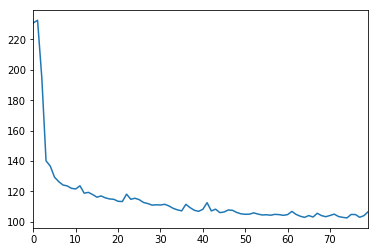

In [102]:
pd.DataFrame(loss_appliance).T['hvac'].plot()

In [103]:
pd.DataFrame(loss_appliance).T

,dw,fridge,hvac,mw,oven,wm
0,14.352724,45.489174,230.820219,6.221469,18.589056,5.620691
1,14.265518,47.206593,232.580727,6.181179,18.508802,5.555157
2,14.291476,51.271829,194.803381,6.126442,18.560780,5.575552
3,14.208875,54.838532,140.155737,6.058088,18.511094,5.516503
4,14.209742,50.783679,136.677215,6.057947,18.562274,5.500769
5,14.207129,48.584482,129.412287,6.054778,18.608385,5.494325
6,14.206100,48.654365,126.442350,6.057012,18.547387,5.496674
7,14.208246,47.807951,124.261686,6.066523,18.676885,5.498822
8,14.204310,50.252423,123.655306,6.055140,18.526761,5.493359
9,14.201816,50.809790,122.068990,6.054816,18.750522,5.492640


In [249]:
pd.DataFrame(loss_appliance).T.tail(1).mean()

dw         14.601142
fridge     32.703391
hvac      102.298246
mw          6.054502
oven       19.366732
wm          5.492065
dtype: float64

In [250]:
model.predict(test_agg)[:, :24].shape
test_hvac.shape
APPLIANCES_ORDER

['aggregate', 'hvac', 'fridge', 'mw', 'dw', 'wm', 'oven']

In [141]:
pred_hvac = model.predict(test_agg)[:, :24]
pred_fridge = model.predict(test_agg)[:, 24:48]
pred_mw = model.predict(test_agg)[:, 48:72]
pred_dw = model.predict(test_agg)[:, 72:96]
pred_wm = model.predict(test_agg)[:, 96:120]
pred_oven = model.predict(test_agg)[:, 120:]








from sklearn.metrics import mean_absolute_error

mae = {}
for appliance in APPLIANCES_ORDER[1:]:
    mae[appliance] = mean_absolute_error(eval("test_"+appliance), eval("pred_"+appliance))
print(pd.Series(mae).mean())
mae

28.907294945304226


{'dw': 14.461963989695176,
 'fridge': 33.156134961647297,
 'hvac': 95.829992939920274,
 'mw': 6.0685100195135915,
 'oven': 18.435102860923067,
 'wm': 5.4920649001259818}

In [120]:

print(mean_absolute_error(pred_hvac, test_hvac))
print(mean_absolute_error(pred_fridge, test_fridge))
print(mean_absolute_error(pred_mw, test_mw))
print(mean_absolute_error(pred_dw, test_dw))
print(mean_absolute_error(pred_wm, test_wm))
print(mean_absolute_error(pred_oven, test_oven))








#print(mean_absolute_error(test_agg, pred_hvac))



100.952879241
33.7715268302
6.10075356096
14.5966103203
5.49206490013
18.5720302564


In [121]:
(128.56+32.71+6.05+14.2+5.5+18.75)/6

34.295

In [122]:
pd.DataFrame(model.predict(test_agg)[:, :]).mean().mean()

189.65565490722656

In [123]:
pd.DataFrame(test_fridge).sum(axis=1).describe()

count    2464.000000
mean     2088.788108
std       750.622251
min         0.000000
25%      1712.175005
50%      2041.358347
75%      2457.379175
max      4060.083328
dtype: float64

In [124]:
pd.DataFrame(test_fridge).iloc[84]

0      45.516666
1      64.349998
2      68.233330
3      67.383331
4      66.900002
5      89.116669
6      74.183334
7     119.566666
8      79.349998
9      78.300003
10     51.716667
11     31.016666
12    137.566666
13     84.550003
14    113.333336
15     76.766670
16     32.966667
17    138.899994
18     53.283333
19     62.366665
20     92.683334
21     36.716667
22     68.150002
23     82.449997
Name: 84, dtype: float64

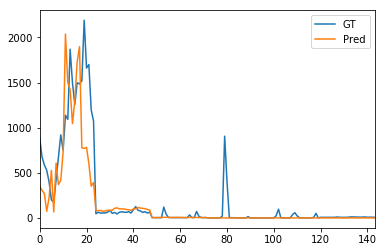

In [126]:
#pd.Series(train_appliance[0]).plot()
pd.Series(train_all_appliances[0]).plot(label='GT')
pd.Series(model.predict(test_agg)[0, :]).plot(label='Pred')
plt.legend()

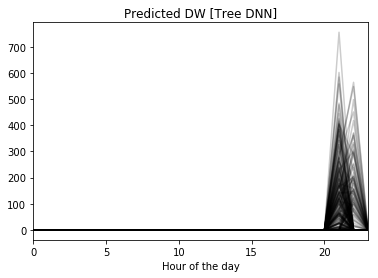

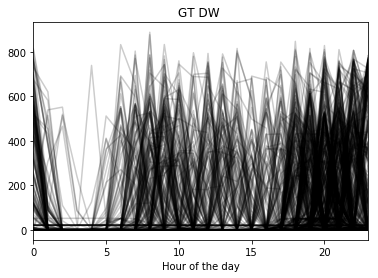

In [127]:
pd.DataFrame(pred_dw).T.plot(legend=False, color='k',alpha=0.2)
plt.title("Predicted DW [Tree DNN]")
plt.xlabel("Hour of the day")
pd.DataFrame(test_dw).T.plot(legend=False, color='k',alpha=0.2)
plt.title("GT DW ")
plt.xlabel("Hour of the day")

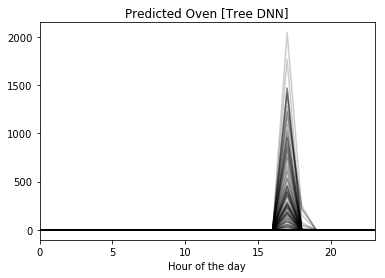

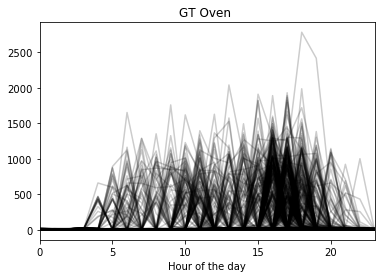

In [128]:
pd.DataFrame(pred_oven).T.plot(legend=False, color='k',alpha=0.2)
plt.title("Predicted Oven [Tree DNN]")
plt.xlabel("Hour of the day")
pd.DataFrame(test_oven).T.plot(legend=False, color='k',alpha=0.2)
plt.title("GT Oven ")
plt.xlabel("Hour of the day")

In [218]:
pd.DataFrame(pred_hvac-test_agg).describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,308.000000,308.000000,308.000000,3.080000e+02,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,...,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,-8.719855,-45.614794,-7.135415,-7.971667e+00,-7.172175,-18.480223,-147.513609,-152.453793,-27.035719,-64.666421,...,-8.413468,-19.909490,-42.936754,-47.697094,-47.043026,-21.094335,-6.990199,-31.927933,-46.293898,-85.879873
std,45.109670,60.061834,30.859192,3.269325e+01,28.594266,119.532227,82.758541,69.688543,61.122479,86.484157,...,51.907125,126.876979,163.263836,149.381453,146.882644,69.227755,50.543880,104.734850,109.939533,103.596838
min,-543.816655,-437.150538,-342.366671,-3.337500e+02,-287.800001,-1889.948818,-1069.916657,-357.506195,-377.699986,-662.013244,...,-736.833309,-1841.840468,-1209.334181,-1165.487390,-1245.134079,-462.636366,-772.333338,-892.741325,-723.091827,-593.544623
25%,-0.000021,-84.867813,-0.000011,-1.442432e-05,-0.000011,-0.000016,-169.689933,-194.442911,-0.000053,-95.100000,...,-0.000032,-0.000040,-0.000061,-0.000068,-0.000078,-0.000050,-0.000031,-0.000045,-0.000074,-128.070320
50%,-0.000001,-18.655516,0.000000,-4.768372e-07,0.000000,0.000000,-132.160551,-156.783971,-0.000007,-46.194264,...,0.000000,-0.000001,-0.000007,-0.000015,-0.000014,-0.000011,-0.000004,-0.000004,-0.000008,-58.803405
75%,0.000008,-0.000004,0.000009,7.629395e-06,0.000007,0.000006,-106.392542,-106.963121,0.000006,-0.000019,...,0.000033,0.000026,0.000023,0.000015,0.000015,0.000015,0.000020,0.000014,0.000007,-0.000012
max,0.000061,0.000050,0.000058,5.793571e-05,0.000079,0.000116,0.000009,0.000004,0.000082,0.000054,...,0.000242,0.000233,0.000221,0.000226,0.000158,0.000194,0.000221,0.000099,0.000094,0.000059


In [40]:
APPLIANCES_ORDER

['aggregate', 'hvac', 'fridge', 'mw', 'dw', 'wm', 'oven']

In [62]:
pd.DataFrame(pred_wm)
pd.DataFrame(test_wm).max()

0      152.100006
1       64.983330
2       56.566666
3       80.933334
4      178.083328
5      182.300003
6      396.783325
7      380.316681
8      389.233337
9      579.233337
10     855.416687
11     584.866638
12    1000.166687
13     688.416687
14     376.350006
15    1015.416687
16    1046.633301
17     936.400024
18     749.533325
19     941.666687
20    1025.233276
21     991.816650
22    1007.716675
23     436.816681
dtype: float64

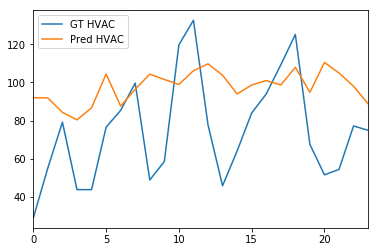

In [148]:
#pd.Series(test_agg[1, :]).plot(label='GT Agg')
pd.Series(test_fridge[17, :]).plot(label='GT HVAC')
pd.Series(pred_fridge[17, :]).plot(label='Pred HVAC')


#pd.Series(test_wm[1, :]).plot(label='GT HVAC')


#pd.Series(test_fridge[1, :]).plot(label='GT Fridge')


#pd.Series(test_mw[1, :]).plot(label='GT MW')
#pd.Series(test_oven[1, :]).plot(label='GT Oven')







#pd.Series(model.predict(test_agg[1:2])[0, :24]).plot(label='Pred HVAC')
#pd.Series(model.predict(test_agg[1:2])[0, 24:48]).plot(label='Pred HVAC')


#pd.Series(model.predict(test_agg[1:2])[0, 24:]).plot(label='Pred Fridge')




plt.legend()

In [37]:
print(np.mean(pred_fridge), np.mean(test_fridge))
np.mean(pred_hvac), np.mean(test_hvac), np.mean(test_agg)

83.1671 87.0328378424


(1134.5818, 1018.3708339143896, 1149.5817138954521)

In [38]:
(pd.DataFrame(test_fridge)-pd.DataFrame(pred_fridge)).abs().sum(axis=1).argmax()

1191

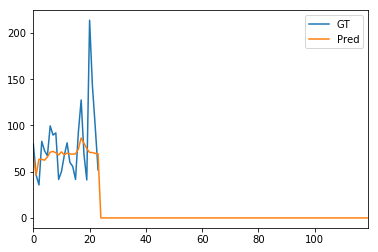

In [39]:
pd.Series(test_fridge[1, :]).plot(label='GT')
pd.Series(model.predict(test_agg_new[1:2])[0, 24:]).plot(label='Pred')


plt.legend()